<a href="https://colab.research.google.com/github/Telury/clase5/blob/master/clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Importar librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/13 - Trece semestre/Procesamiento de imagen/Practicas clase/clase5'
os.chdir(path)
!pwd

/content/drive/My Drive/13 - Trece semestre/Procesamiento de imagen/Practicas clase/clase5


In [0]:
def displayGray3(a, b, c, title1 = "Original", title2 = "Edited", title3 = "Edited"):
  plt.figure(figsize=(20,20))
  plt.subplot(131), plt.imshow(a,cmap="gray"), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap="gray"), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap="gray"), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a, b, title1 = "Original", title2 = "Edited"):
  plt.figure(figsize=(20,20))
  plt.subplot(121), plt.imshow(a,cmap="gray"), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap="gray"), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
 
def displayGray4(a, b, c, d, title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited"):
  plt.figure(figsize=(20,20))
  plt.subplot(141), plt.imshow(a, cmap="gray"), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(142), plt.imshow(b, cmap="gray"), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(143), plt.imshow(c, cmap="gray"), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.subplot(144), plt.imshow(d, cmap="gray"), plt.title(title4)
  plt.xticks([]), plt.yticks([])
  plt.show()

def displayColor3(a, b, c, title1 = "Original", title2 = "Edited", title3 = "Edited"):
  plt.figure(figsize=(20,20))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
  
def displayColor2(a, b, title1 = "Original", title2 = "Edited"):
  plt.figure(figsize=(20,20))
  plt.subplot(131), plt.imshow(a,cmap="gray"), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap="gray"), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def readRGB(imgPath):
  img = cv2.imread(imgPath)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

# Filtro box

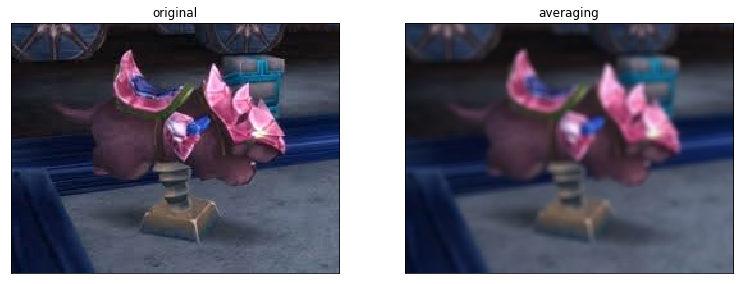

In [0]:
img = cv2.imread('imgB.jpg')

kernel = np.ones((5,5), np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

displayColor2(img,dst,'original','averaging')

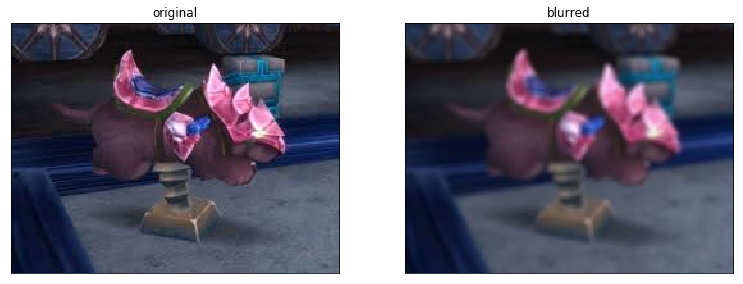

In [0]:
img = cv2.imread('imgB.jpg')
blur = cv2.blur(img,(5,5))
displayColor2(img,blur,'original','blurred')

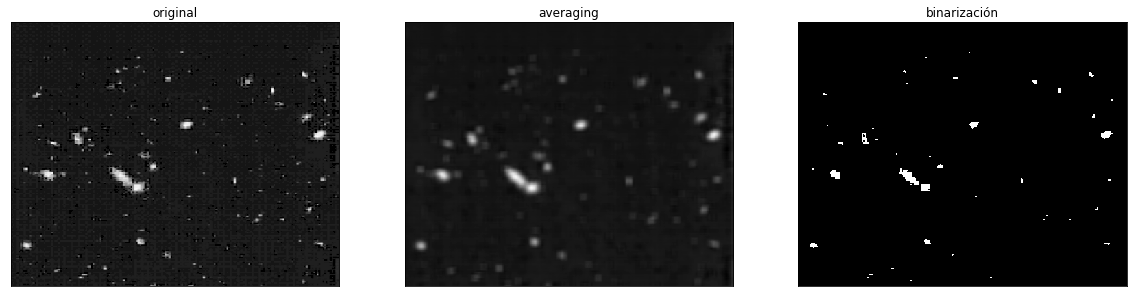

In [0]:
def Threshold(img,thres):
    #Cargar imagen
    img = cv2.imread(img,0)
    #kernel = np.ones((10,10), np.float32)/100
    blur = cv2.blur(img,(10,10))
    dst = cv2.filter2D(img,-1,kernel)

    rows, columns = dst.shape
    img2 = np.zeros((rows, columns), dtype = np.uint8)
     
    #intervalos
    T = thres
 
    for x in range(0,rows):
        for y in range(0,columns):
            r = img[x][y]
            if T<=r:
                img2[x][y] = 255
            else:
                img2[x][y] = 0
    displayGray3(img,blur,img2, 'original','averaging', 'binarización')

    return
Threshold('manchas.png',150)



```
# img2 = np.zeros((rows,columns), dtype = np.uint8)

# Intervalos
T = 100  
   
for x in range(0,rows):
  for y in range(0,columns):
    r = img[x][y]
    if T<=r:
      img2[x][y] = 255
    else:
      img2[x][y] = 0
displayGray3(img,blur,img2, 'original','averaging', 'binarización')
```



# Espectro de magnitud (FFT)

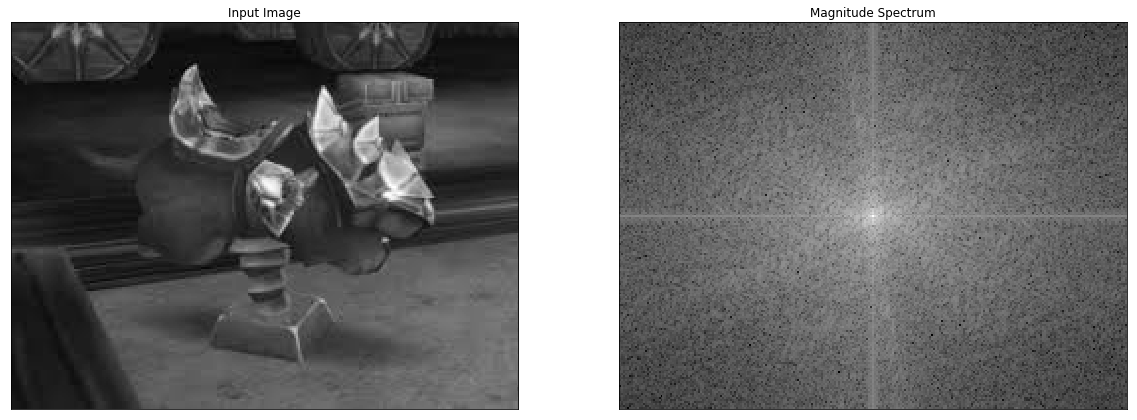

In [0]:
img = cv2.imread('imgB.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

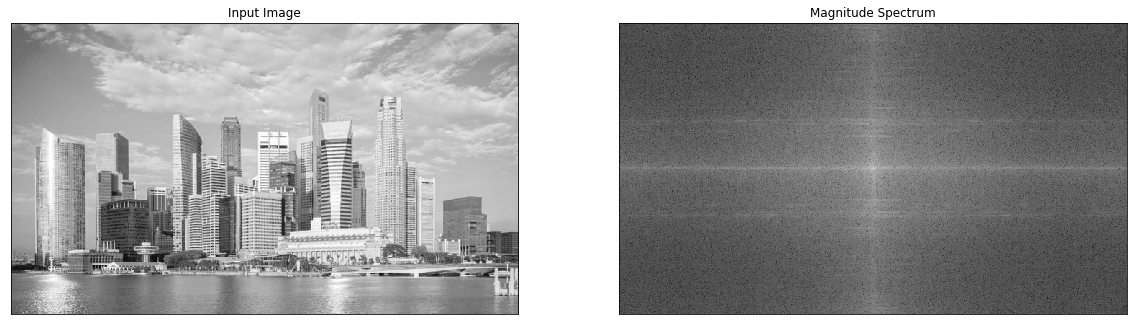

In [0]:
img = cv2.imread('edif.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

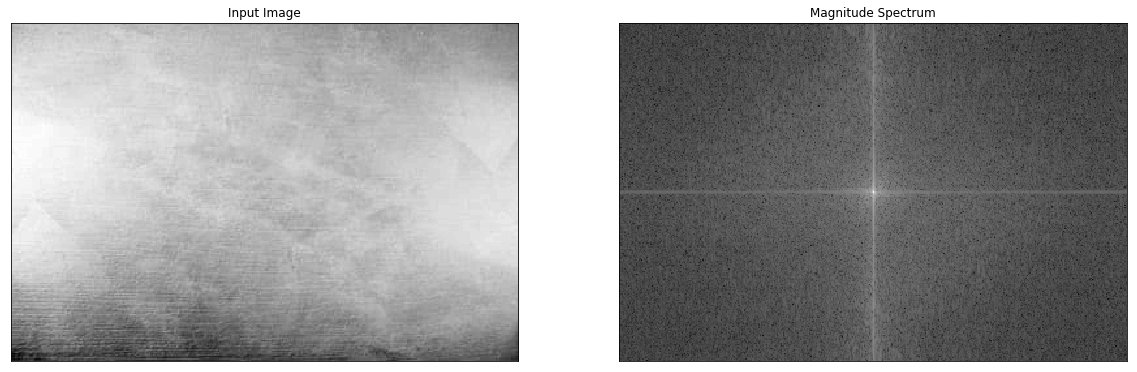

In [0]:
img = cv2.imread('wall.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


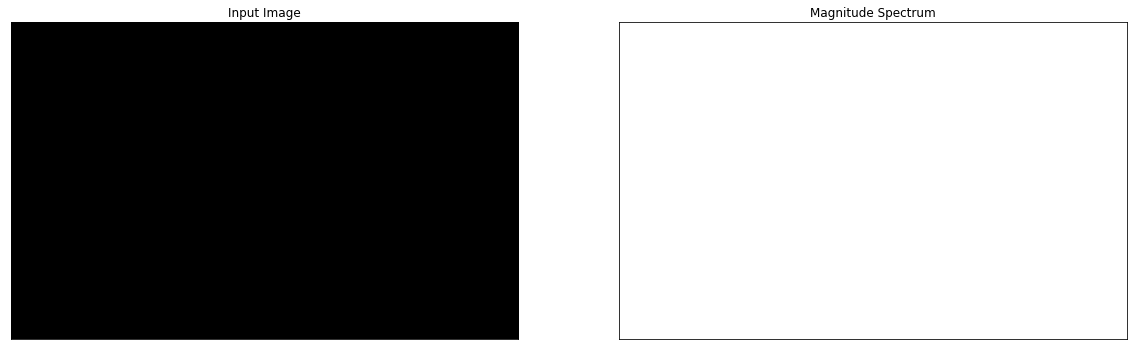

In [0]:
img = cv2.imread('blue.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

# Fourier

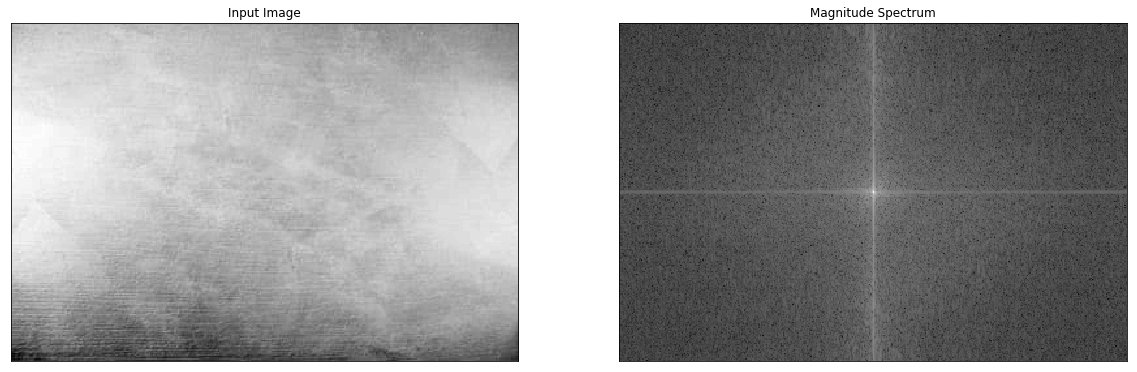

In [0]:
img = cv2.imread('wall.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

'''
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img,cmap = 'gray')
plt.title('Image original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitud_spectrum_ori,cmap="gray")
plt.title('Espectro sin centrar'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(magnitud_spectrum_ori,cmap="gray")
plt.title('Espectro centrado'), plt.xticks([]), plt.yticks([])
plt.show()
'''

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

# Cuadrado FFT

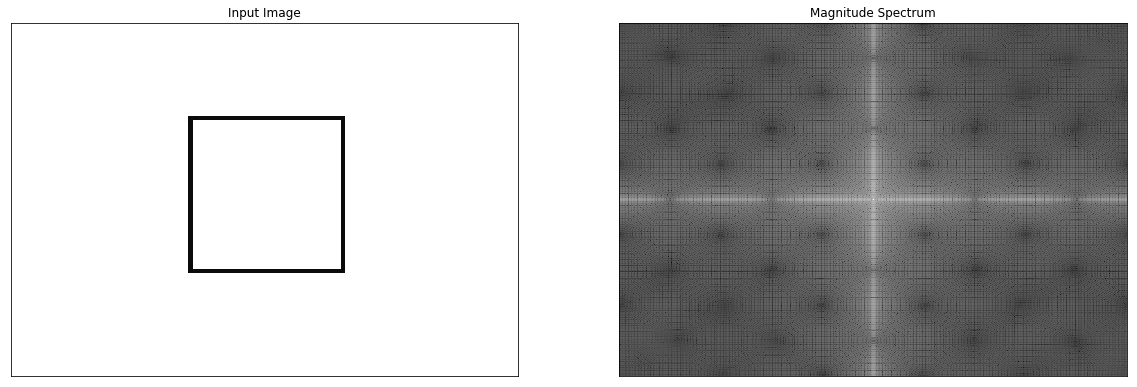

In [0]:
img = cv2.imread('squa.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

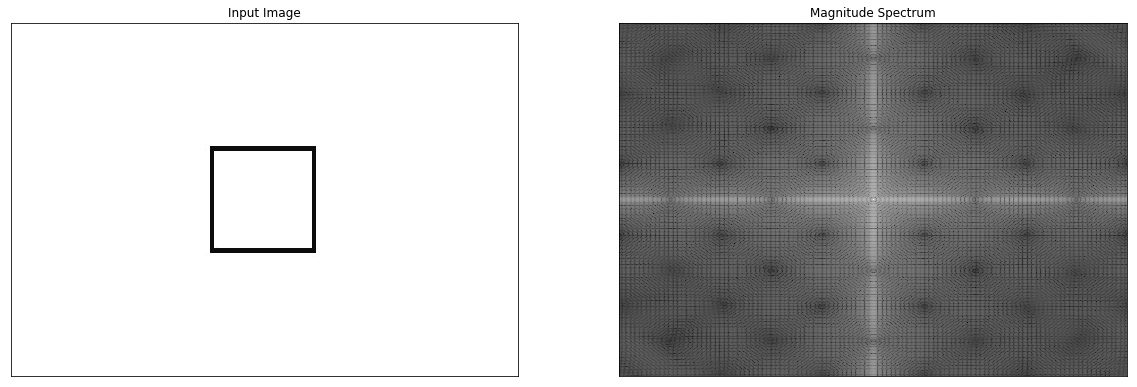

In [0]:
img = cv2.imread("squa30.jpg",0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

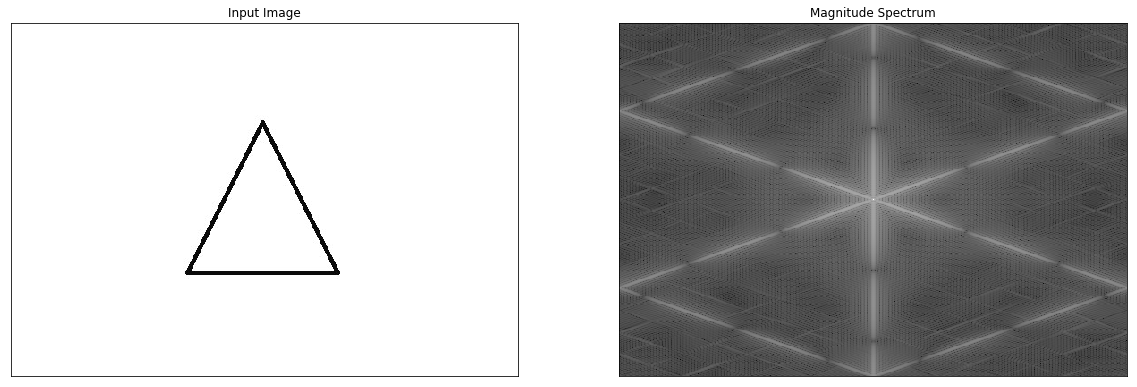

In [0]:
img = cv2.imread('trian.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

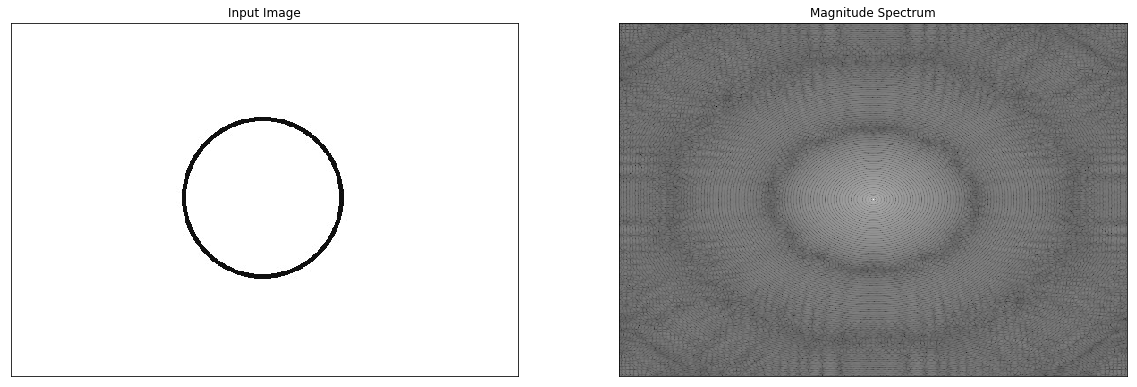

In [0]:
img = cv2.imread('circ.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

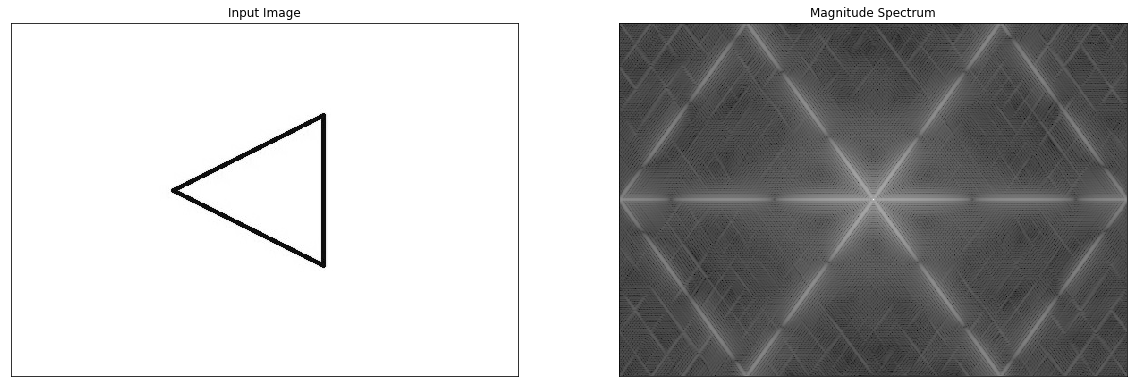

In [0]:
img = cv2.imread('triangir.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

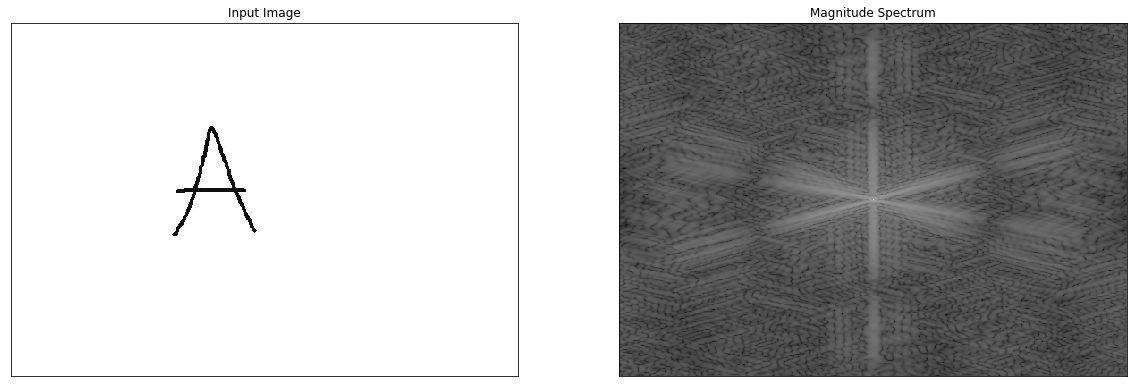

In [0]:
img = cv2.imread('a.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

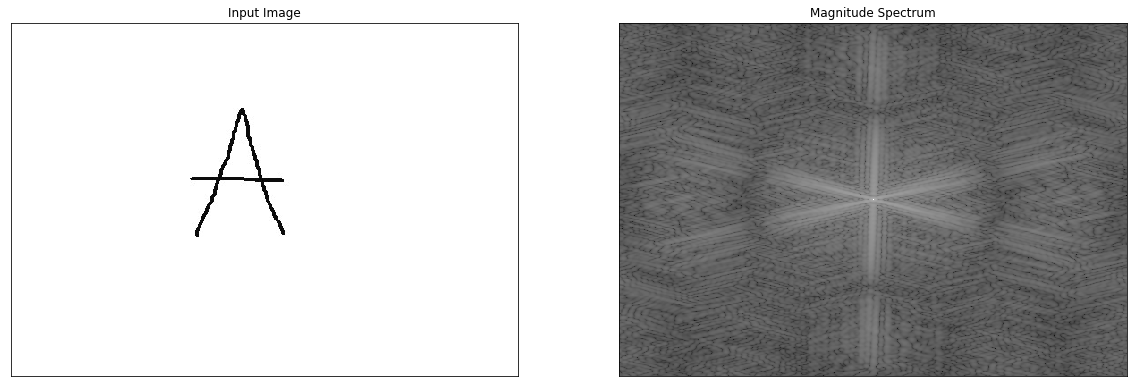

In [0]:
img = cv2.imread('a2.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

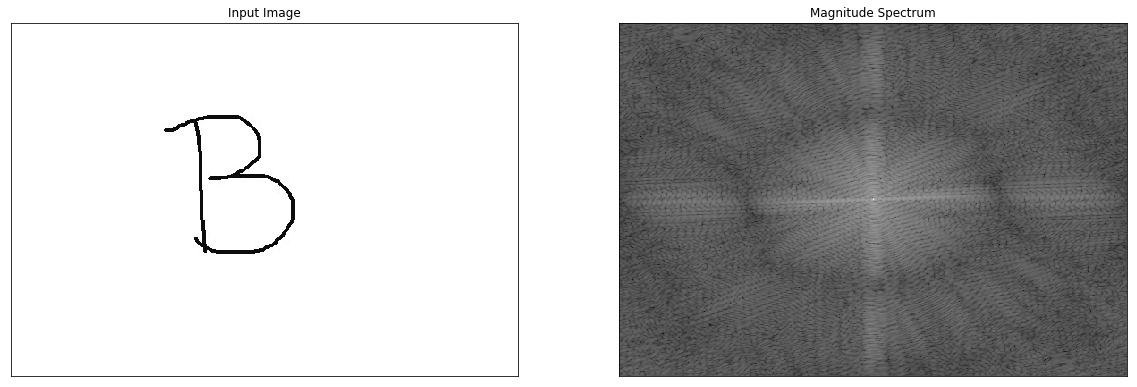

In [0]:
img = cv2.imread('b.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

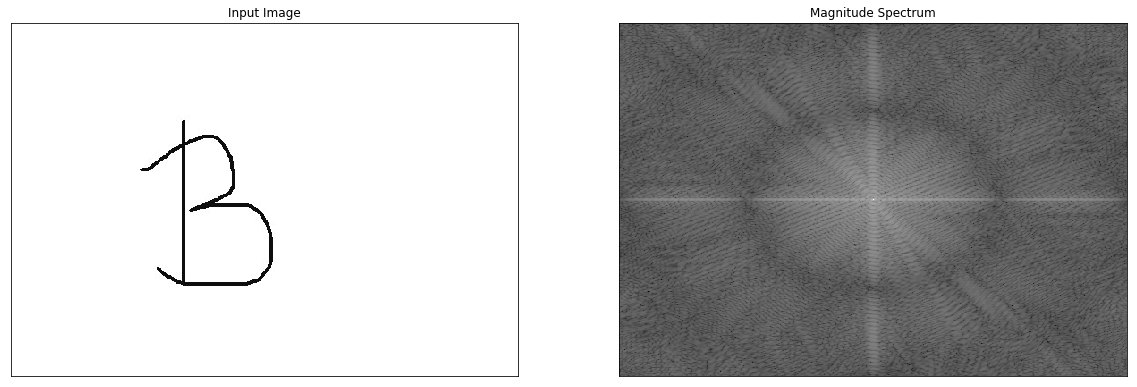

In [0]:
img = cv2.imread('b2.jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum_ori = 20*np.log(np.abs(f))

displayGray2(img,magnitude_spectrum, "Input Image", "Magnitude Spectrum")

# Filtro pasa bajas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


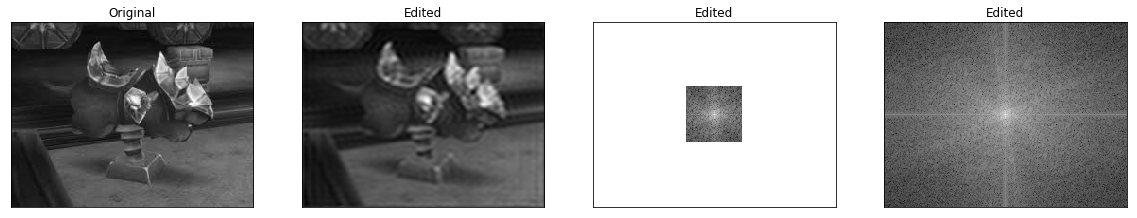

In [0]:
img = cv2.imread('imgB.jpg',0)

img_flotante = np.float32(img)
dft = cv2.dft(img_flotante, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

# Creemos una máscara con un centro cuadrado de 1 y el resto zeros
mask = np.zeros((fils, cols,2), np.uint8)
mask[np.int32(centfils)-30:np.int32(centfils)+30, np.int32(centcols)-30:np.int32(centcols)+30]=1 # Todos los valores numéricos eran 30

# Aplicamos la máscara y luego obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back  = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

displayGray4(img, img_back,fshift_mask_mag, magnitude_spectrum)

# Filtro pasa altas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


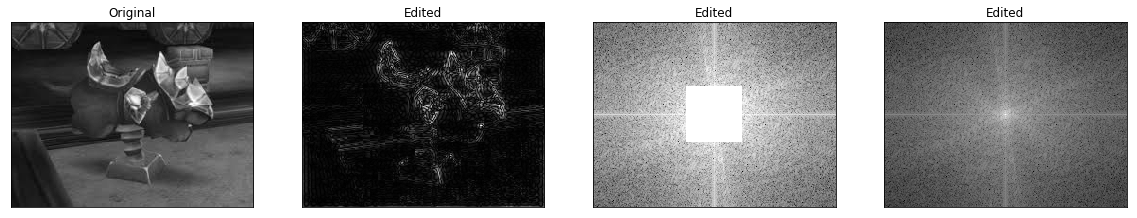

In [0]:
img = cv2.imread('imgB.jpg',0)

img_flotante = np.float32(img)
dft = cv2.dft(img_flotante, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

fils, cols = img.shape
centfils, centcols = fils/2, cols/2

# Creemos una máscara con un centro cuadrado de 0 y el resto ones
mask = np.ones((fils, cols,2), np.uint8)
mask[np.int32(centfils)-30:np.int32(centfils)+30, np.int32(centcols)-30:np.int32(centcols)+30]=0

# Aplicamos la máscara y luego obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back  = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

displayGray4(img, img_back,fshift_mask_mag, magnitude_spectrum)

# Ejercicio: Filtrar figuras pequeñas (Pasa bajas)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


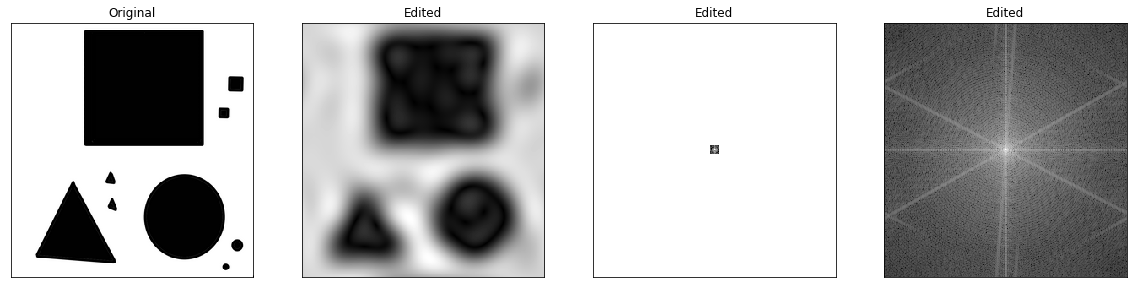

In [0]:
# Es un pasabajas porque los cuadros son altos.

img = cv2.imread('figuras.png',0)

img_flotante = np.float32(img)
dft = cv2.dft(img_flotante, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

# Creemos una máscara con un centro cuadrado de 1 y el resto zeros
mask = np.zeros((fils, cols,2), np.uint8)
mask[np.int32(centfils)-5:np.int32(centfils)+5, np.int32(centcols)-5:np.int32(centcols)+5]=1 # Todos los valores numéricos eran 30

# Aplicamos la máscara y luego obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back  = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

displayGray4(img, img_back,fshift_mask_mag, magnitude_spectrum)



---



# Clase Septiembre 30 2019 - Semana 10

- Los pasabajas están en el centro de una imagen.
- Los pasaltos están en los bordes de la imagen.

Si quiero hacer un filtro pasabajos, en el centro de la matriz pongo 1 y en los bordes de la matriz pongo 0, de esta manera paso solo los bajos.
Si quiero un filtro pasaltos, realizo lo contrario al punto anterior.

**Filtro pasabajos con un círculo**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


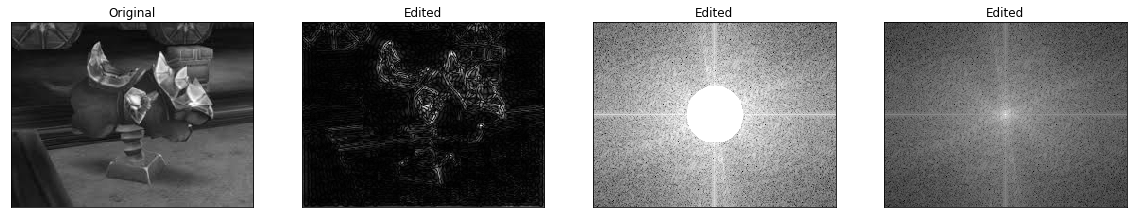

In [8]:
img = cv2.imread('imgB.jpg',0)

img_flotante = np.float32(img)
dft = cv2.dft(img_flotante, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

fils, cols = img.shape
centfils, centcols = fils/2, cols/2

# Creemos una máscara con un centro circular de 0 y el resto ones
mask = np.ones((fils, cols,2), np.uint8)

# Centro circular
r = 30
center = [centfils, centcols]
x, y = np.ogrid[:fils,:cols]

mask = np.ones((fils,cols,2), np.uint8)
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# Aplicamos la máscara y luego obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back  = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

displayGray4(img, img_back,fshift_mask_mag, magnitude_spectrum)

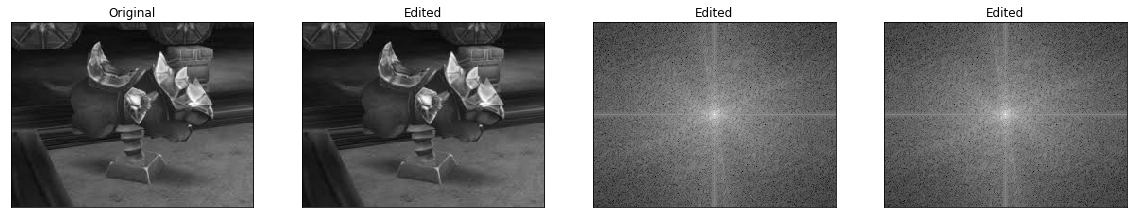

In [9]:
img = cv2.imread('imgB.jpg',0)

img_flotante = np.float32(img)
dft = cv2.dft(img_flotante, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

fils, cols = img.shape
centfils, centcols = fils/2, cols/2

# Creemos una máscara con un centro circular de 0 y el resto ones
mask = np.ones((fils, cols,2), np.uint8)

# Centro circular
r = 30
center = [centfils, centcols]
x, y = np.ogrid[:fils,:cols]

mask = np.ones((fils,cols,2), np.uint8)
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Aplicamos la máscara y luego obtenemos la inversa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back  = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

displayGray4(img, img_back,fshift_mask_mag, magnitude_spectrum)